In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from pyESN import ESN

#import data
data=pd.read_csv("./DB/apple_stock.csv")

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [11]:
print(data.shape)
print(data[0:1])

(2475, 7)
         Date       Open       High     Low      Close  Adj Close     Volume
0  2014-01-02  19.845715  19.893929  19.715  19.754642  17.318729  234684800


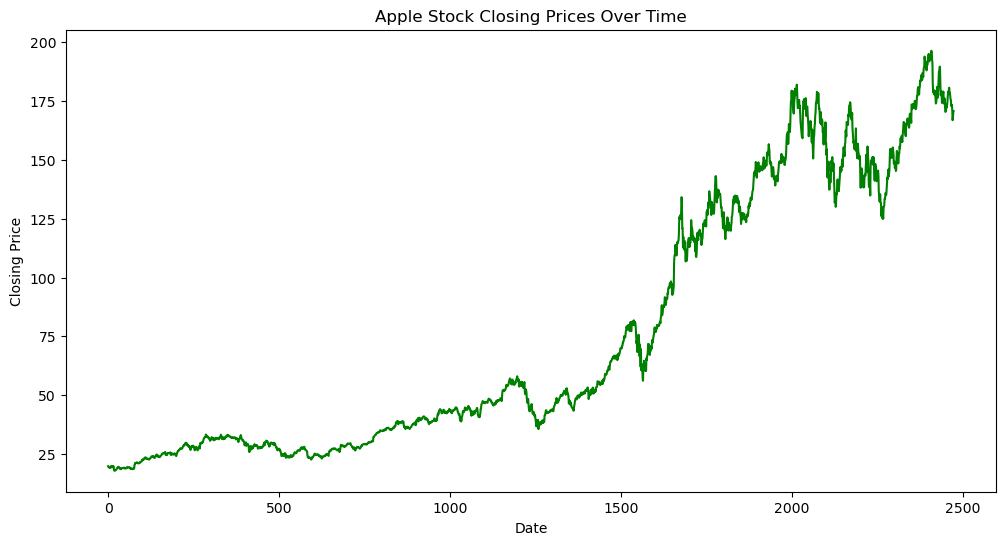

In [13]:
# Line plot of closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='green')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [15]:
# Check for missing values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


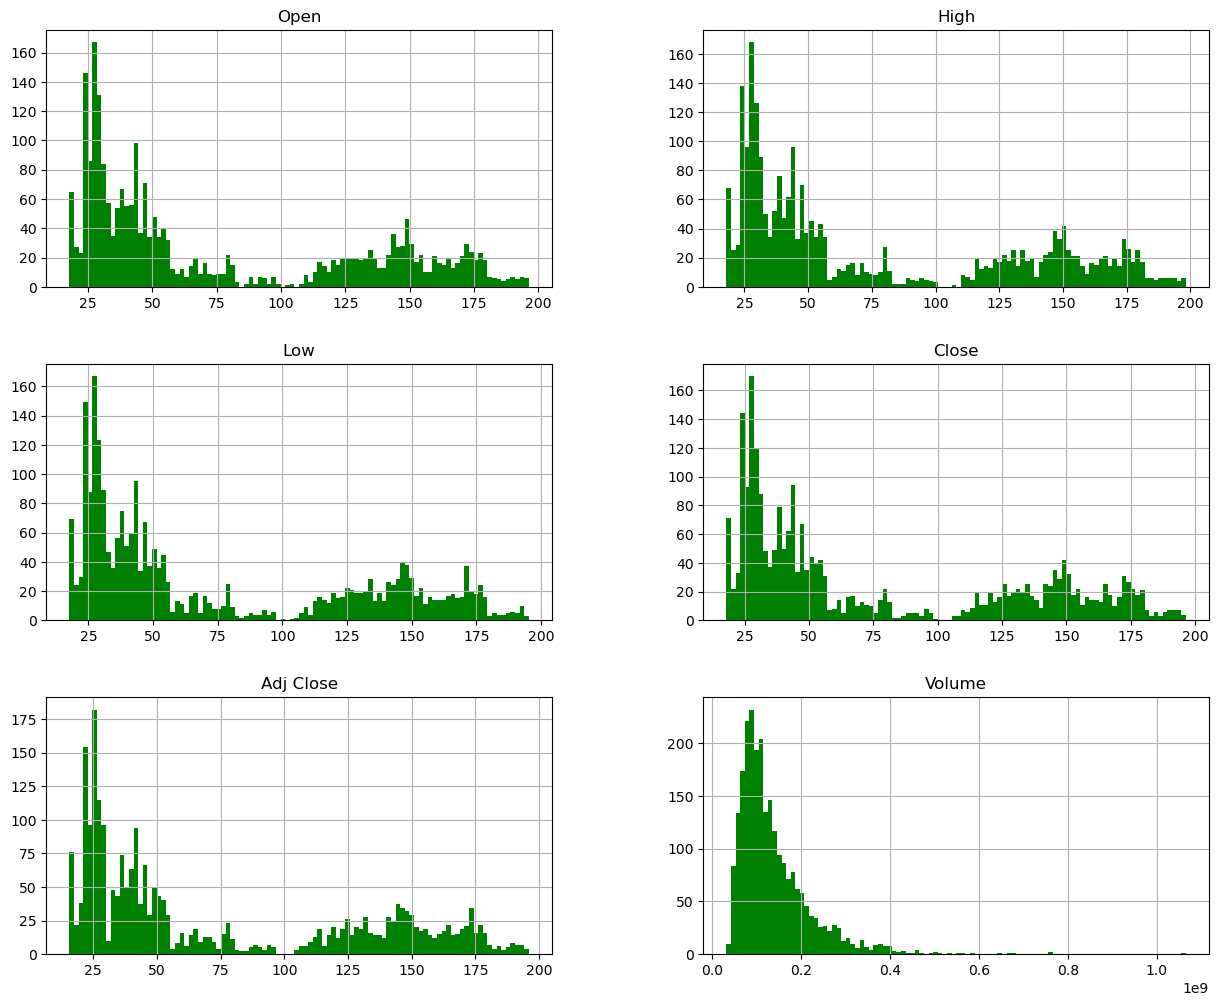

In [17]:
data.hist(bins=100, figsize=(15, 12), color='green')
plt.show()

In [18]:
# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

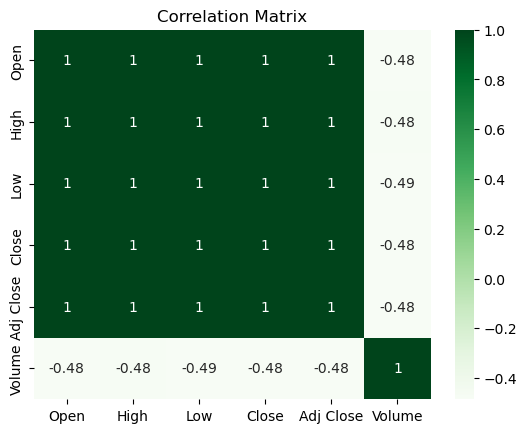

In [21]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

this Correlation Matrix shows that all features (exept for volume) are corealted

In [24]:
#Normalization 
from sklearn.preprocessing import MinMaxScaler

# Select the feature to scale (e.g., 'Adj Close')
scaler = MinMaxScaler()
data['Close Scaled'] = scaler.fit_transform(data[['Close']])


In [26]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close Scaled'], dtype='object')


In [28]:
data= data.drop(['High','Low','Close', 'Volume','Open','Adj Close'], axis = 1)


In [30]:
data.head()

,Close Scaled
Date,
2014-01-02,0.010668
2014-01-03,0.008239
2014-01-06,0.008829
2014-01-07,0.008051
2014-01-08,0.008735


In [32]:
!pip install statsmodels

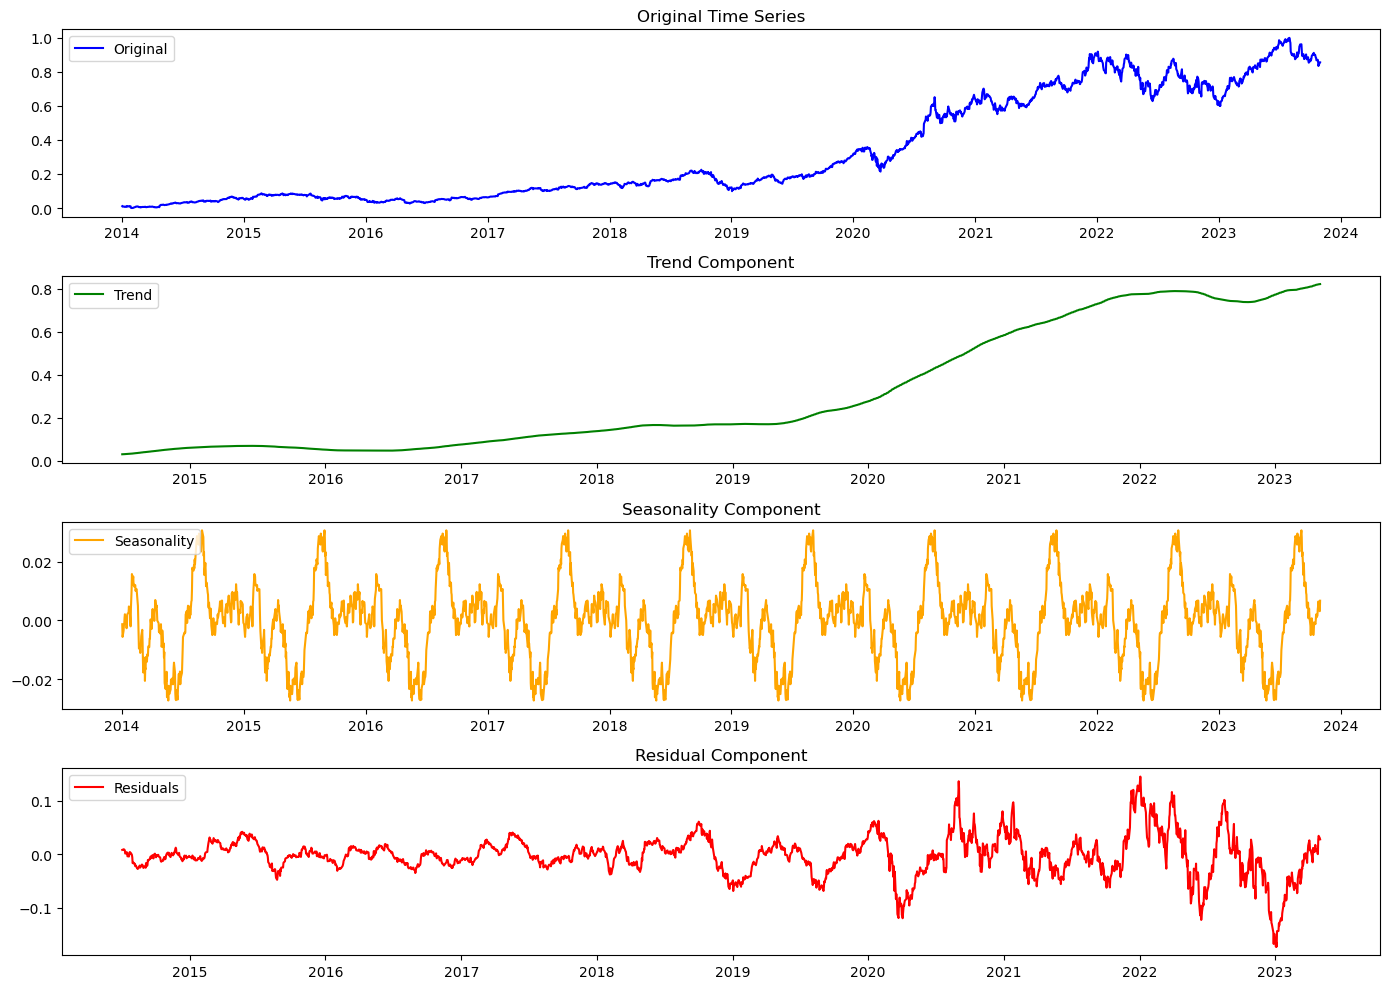

Trend head:
 Date
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
2014-01-08   NaN
Name: trend, dtype: float64
Seasonality head:
 Date
2014-01-02   -0.001270
2014-01-03   -0.005588
2014-01-06   -0.003522
2014-01-07   -0.001691
2014-01-08   -0.001211
Name: seasonal, dtype: float64
Residuals head:
 Date
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
2014-01-08   NaN
Name: resid, dtype: float64


In [33]:
result = seasonal_decompose(data['Close Scaled'], model='additive', period=252)

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot components
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(data['Close Scaled'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.title('Seasonality Component')
plt.legend(loc='upper left')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Optional: Inspect components
print("Trend head:\n", trend.head())
print("Seasonality head:\n", seasonal.head())
print("Residuals head:\n", residual.head())


#Data splitting

In [79]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.3, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)